<a href="https://colab.research.google.com/github/hajime-8123/AI-Application-repository/blob/main/Week5_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import TensorFlow and other Liblaries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the dataset into trainning and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0


11490434/11490434 [==============================] - 0s 0us/step


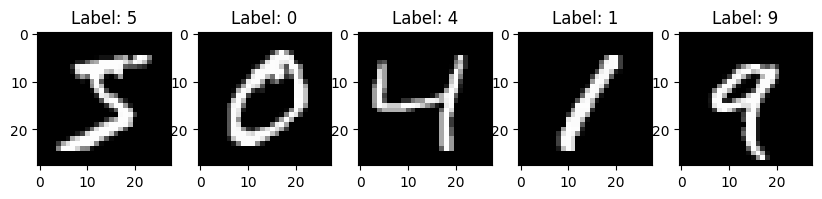

In [11]:
#Explore the dataset

#Plot the first 5 images from the training set
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
plt.show()

In [12]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0357 - accuracy: 0.9892
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0288 - accuracy: 0.9910
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0224 - accuracy: 0.9930
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0188 - accuracy: 0.9943
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0168 - accuracy: 0.9946


In [15]:
# Evaluate the model

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9791
Test accuracy: 0.9790999889373779


In [16]:
# Funciton to create and evaluate model with different activation functions
def evaluate_activation(activation_function):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation=activation_function),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=5)
    test_loss, test_acc =model.evaluate(test_images, test_labels)
    print(f"Test accuracy with {activation_function}: {test_acc}")

In [17]:
# Evaluate models with different activation functions
for activation in ['sigmoid','tanh', 'relu']:
    evaluate_activation(activation)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3975 - accuracy: 0.8963
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1961 - accuracy: 0.9441
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1435 - accuracy: 0.9588
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1114 - accuracy: 0.9681
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0987 - accuracy: 0.9688
Test accuracy with sigmoid: 0.9688000082969666
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2856 - accuracy: 0.9165
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1356 - accuracy: 0.9609
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0919 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0670 - accuracy: 0.9798
Epoch 5/5
313/313 [===========================

In [ ]:
for lr in [0.001, 0.01, 0.1]:
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model = tf.keras.Sequential([
        tf.keras.Flatten(input_shape=(28,28)),
        tf.keras.Dense(128, activation= 'relu'),
        tf.keras.layers.Dense(10, activation= 'softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=5, batch_size=32)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test accuracy with learning rate {lr}:{test_acc}")

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset and preprocess it
# For example, you can use the Fashion MNIST dataset as a placeholder
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a neural network model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout with a dropout rate of 0.5 (you can adjust this value)
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6231 - accuracy: 0.7786
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4772 - accuracy: 0.8285
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4422 - accuracy: 0.8399
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4273 - accuracy: 0.8443
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4092 - accuracy: 0.8498
313/313 - 1s - loss: 0.3875 - accuracy: 0.8599 - 555ms/epoch - 2ms/step

Test accuracy: 0.8598999977111816


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

# Load your dataset and preprocess it
# For example, you can use the Fashion MNIST dataset as a placeholder
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a neural network model with L2 regularization
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # L2 regularization with a strength of 0.01
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),   # L2 regularization with a strength of 0.01
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0274 - accuracy: 0.7874
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7031 - accuracy: 0.8085
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6554 - accuracy: 0.8177
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6168 - accuracy: 0.8267
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5997 - accuracy: 0.8301
313/313 - 1s - loss: 0.6147 - accuracy: 0.8237 - 599ms/epoch - 2ms/step

Test accuracy: 0.8237000107765198


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

# Load your dataset and preprocess it
# For example, you can use the Fashion MNIST dataset as a placeholder
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a baseline model (no regularization)
baseline_model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the baseline model
baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Create a regularized model with L2 regularization
l2_model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(10, activation='softmax')
])

# Compile the L2 regularized model
l2_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Create a regularized model with dropout
dropout_model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout with a dropout rate of 0.5
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Add dropout with a dropout rate of 0.5
    layers.Dense(10, activation='softmax')
])

# Compile the dropout regularized model
dropout_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the models
baseline_history = baseline_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
l2_history = l2_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
dropout_history = dropout_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the models
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(x_test, y_test, verbose=2)
l2_test_loss, l2_test_acc = l2_model.evaluate(x_test, y_test, verbose=2)
dropout_test_loss, dropout_test_acc = dropout_model.evaluate(x_test, y_test, verbose=2)

print(f'\nBaseline Test accuracy: {baseline_test_acc}')
print(f'L2 Regularized Test accuracy: {l2_test_acc}')
print(f'Dropout Regularized Test accuracy: {dropout_test_acc}')


Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4939 - accuracy: 0.8257 - val_loss: 0.4139 - val_accuracy: 0.8500
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3700 - accuracy: 0.8646 - val_loss: 0.4248 - val_accuracy: 0.8479
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3334 - accuracy: 0.8773 - val_loss: 0.4052 - val_accuracy: 0.8488
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3098 - accuracy: 0.8860 - val_loss: 0.3511 - val_accuracy: 0.8707
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2928 - accuracy: 0.8903 - val_loss: 0.3436 - val_accuracy: 0.8755
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0382 - accuracy: 0.7896 - val_loss: 0.7568 - val_accuracy: 0.7954
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7098 - accuracy: 0.8118 - val_loss: 0.7318 - val_accuracy: 0.794

In [34]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report


(x_test, y_true) = 1


model = keras.models.load_model('your_model.h5')

# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert probability predictions to class labels
y_pred = tf.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1-score using TensorFlow/Keras metrics
precision = tf.keras.metrics.Precision()(y_true, y_pred)
recall = tf.keras.metrics.Recall()(y_true, y_pred)
f1_score = tf.keras.metrics.F1Score(num_classes=num_classes, average='weighted')(y_true, y_pred)

# Print the results
print(f'Precision: {precision.numpy()}')
print(f'Recall: {recall.numpy()}')
print(f'F1-Score: {f1_score.numpy()}')

# Generate a classification report using scikit-learn
report = classification_report(y_true, y_pred)
print(report)


TypeError: ignored

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1

# CNN Model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Reshape input data for CNN (add channel dimension)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Train the CNN model
cnn_model.fit(x_train_cnn, y_train, epochs=5)

# Evaluate the CNN model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=2)

# Baseline Feedforward Neural Network Model
baseline_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the baseline model
baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train the baseline model
baseline_model.fit(x_train, y_train, epochs=5)

# Evaluate the baseline model
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(x_test, y_test, verbose=2)

# Compare the performance of the models
print("CNN Model Test Accuracy:", cnn_test_acc)
print("Baseline Model Test Accuracy:", baseline_test_acc)

# Generate a classification report for the CNN model
cnn_predictions = cnn_model.predict(x_test_cnn)
cnn_pred_labels = [tf.argmax(prediction).numpy() for prediction in cnn_predictions]
cnn_report = classification_report(y_test, cnn_pred_labels)
print("CNN Model Classification Report:")
print(cnn_report)


Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1420 - accuracy: 0.9560
Epoch 2/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0465 - accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0328 - accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0245 - accuracy: 0.9921
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0177 - accuracy: 0.9945
313/313 - 2s - loss: 0.0275 - accuracy: 0.9914 - 2s/epoch - 7ms/step
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2570 - accuracy: 0.9265
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1146 - accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0809 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0601 - accuracy: 0.9814
Epoch 5/5
18